In [2]:
#importing all the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action = 'ignore')

In [3]:
#importing the dataset into a dataframe
data1=pd.read_csv("wbc.csv")
#No of rows and columns of dataset
data1.shape

(689, 11)

In [4]:
#viewing some sample records
data1.head(5)

,ID,Mitoses,Marginal_Adhesion,clump_thickness,Uniformity_of_Cellsize,Uniformity_of_cell_Shape,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatian,Normal_Nucleoli,Class
0,1000025,1,1,5,1,1,2,1.0,3,1,2
1,1002945,1,5,5,4,4,7,10.0,3,2,2
2,1015425,1,1,3,1,1,2,2.0,3,1,2
3,1016277,1,1,6,8,8,3,4.0,3,7,2
4,1017023,1,3,4,1,1,2,1.0,3,1,2


In [5]:
#Checking NaN values
data1.isna().sum()

ID                              0
Mitoses                         0
Marginal_Adhesion               0
clump_thickness                 0
Uniformity_of_Cellsize          0
Uniformity_of_cell_Shape        0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatian                0
Normal_Nucleoli                 0
Class                           0
dtype: int64

In [6]:
data1.shape

(689, 11)

In [7]:
#dropping the rows with atleast one NaN
data1=data1.dropna()
data1.shape

(673, 11)

In [8]:
#checking the NaN values again
data1.isna().sum()

ID                             0
Mitoses                        0
Marginal_Adhesion              0
clump_thickness                0
Uniformity_of_Cellsize         0
Uniformity_of_cell_Shape       0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatian               0
Normal_Nucleoli                0
Class                          0
dtype: int64

In [9]:
#checking the data types of the attributes/features
data1.dtypes

ID                               int64
Mitoses                          int64
Marginal_Adhesion                int64
clump_thickness                  int64
Uniformity_of_Cellsize           int64
Uniformity_of_cell_Shape         int64
Single_Epithelial_Cell_Size      int64
Bare_Nuclei                    float64
Bland_Chromatian                 int64
Normal_Nucleoli                  int64
Class                            int64
dtype: object

In [10]:
#Counting number of rows in each class i.e benign and malignant
data1['Class'].value_counts()

2    438
4    235
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

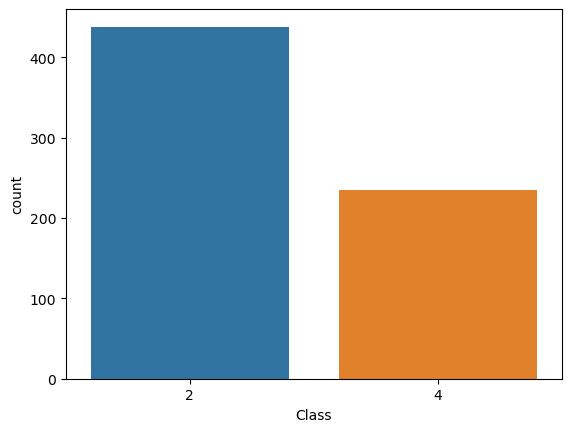

In [11]:
#visualising the count through countplot
sns.countplot(data1['Class'],label='count')

<AxesSubplot:>

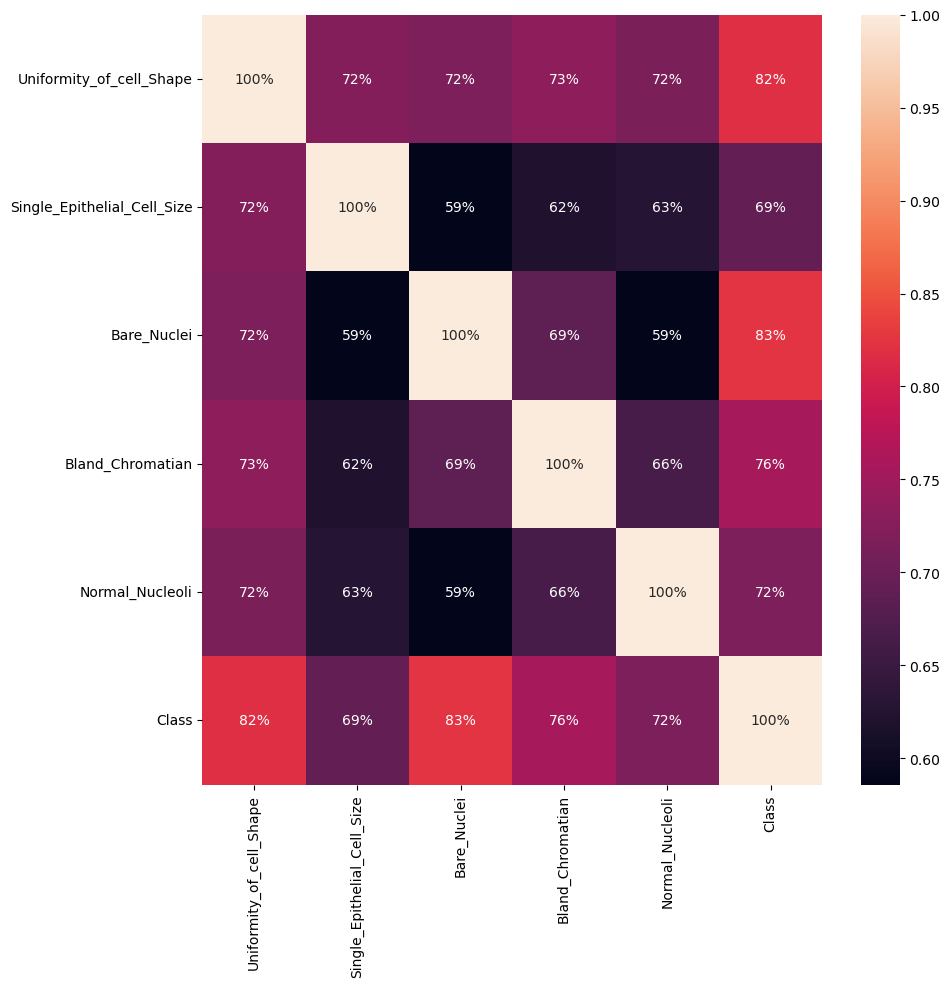

In [12]:
#Visualising the correlation(%) among the features with the help of heatmap
plt.figure(figsize=(10,10))
sns.heatmap(data1.iloc[:,5:].corr(),annot=True,fmt='.0%')

In [13]:
#dividing the given dataset into dependent and independent variables i.e input features(X) and target variable(Y)
X=data1.iloc[:,1:10].values
Y=data1.iloc[:,10].values
X.shape
#Y.shape


(673, 9)

In [14]:
#Standardizing the dataset using StandardScalar
from sklearn.preprocessing import StandardScaler as ss
sc=ss()
X_std=sc.fit_transform(X)
X_std.shape

(673, 9)

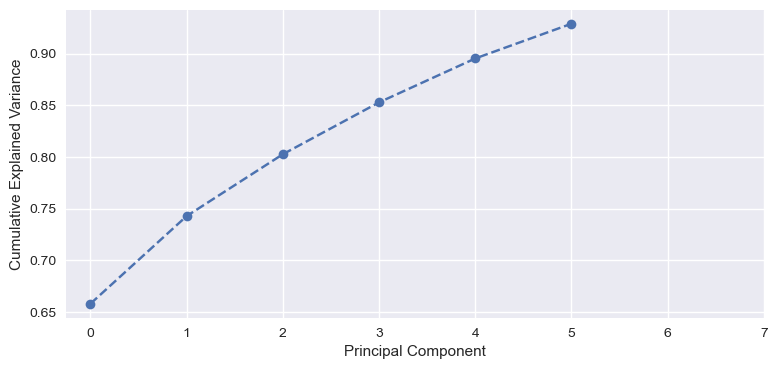

In [15]:
#Plotting the graph of principal component versus cummulative explained variance
from sklearn.decomposition import PCA
#Doing dimensionality reduction using pca 
pca = PCA(n_components=6)
#X_pca = pca.fit_transform(X_std)
X_pc=pca.fit(X_std)
X_pc=pca.transform(X_std)
plt.style.use('seaborn')

def plot_pca():
    plt.figure(figsize = (9, 4))
    plt.plot(np.cumsum(pca.explained_variance_ratio_), '--o')
    plt.xlabel('Principal Component')
    plt.ylabel('Cumulative Explained Variance')
    plt.xticks(np.arange(0, 8, 1.0))
    plt.show()

plot_pca()

In [16]:
from numpy import array
from sklearn.model_selection import KFold,cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

kfold=KFold(5)
model0=DecisionTreeClassifier(criterion='entropy')
model2=SVC(kernel='linear',random_state=1, gamma = 0.002,C=1)
model3=SVC(kernel='rbf',random_state=1, gamma = 0.002,C=1)

scores_PCA_decisiontree=cross_val_score(model0,X_pc,Y,cv=kfold)
scores_PCA_linear = cross_val_score(model2, X_pc, Y, cv = kfold)
scores_PCA_RBF = cross_val_score(model3,X_pc, Y, cv = kfold)


print('DecisionTree Accuracy:',np.average(scores_PCA_decisiontree)*100)
print('Linear SVM_Accuracy:',np.average(scores_PCA_linear)*100)
print('RBF SVM_Accuracy:',np.average(scores_PCA_RBF)*100)

DecisionTree Accuracy: 94.66003316749585
Linear SVM_Accuracy: 96.5870646766169
RBF SVM_Accuracy: 96.4400221116639


In [17]:
#Performing the K-Fold Cross Validation for reduced subspace features
from numpy import array
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC

# prepare cross validation
kfold = KFold(5)

#Implementation of Support Vector Classifier(SVC)

#Enumerate the splits
scores_linear_All = cross_val_score(SVC(kernel='linear',C=1, gamma = 0.002), X, Y, cv = kfold)
scores_RBF_All = cross_val_score(SVC(kernel='rbf',random_state=1, gamma = 0.002,C=1), X, Y, cv = kfold)
scores_PCA_linear_selected = cross_val_score(SVC(kernel='linear',C=1, gamma = 0.002), X_pc, Y, cv = kfold)
scores_PCA_RBF_selected = cross_val_score(SVC(kernel='rbf',random_state=1, gamma = 0.002,C=1), X_pc, Y, cv = kfold)
#printing the Average of scores from all the splits
print("Before PCA")
print('              Linear SVM_Accuracy:',np.average(scores_linear_All)*100)
print('              RBF SVM_Accuracy   :',np.average(scores_RBF_All)*100)
print("After PCA")
print('              Linear SVM_Accuracy:',np.average(scores_PCA_linear_selected)*100)
print('              RBF SVM_Accuracy   :',np.average(scores_PCA_RBF_selected)*100)


Before PCA
              Linear SVM_Accuracy: 96.44002211166392
              RBF SVM_Accuracy   : 96.1437258153676
After PCA
              Linear SVM_Accuracy: 96.5870646766169
              RBF SVM_Accuracy   : 96.4400221116639


In [18]:
#Prediction of the Output for a sample input features
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_pc,Y,test_size=0.2,random_state=52)
modelx=SVC()
modelx.fit(X_train,Y_train) 
#x_1=[[5,10,10,5,4,5,4,4,1],[4,8,8,5,4,5,10,4,1],[3,1,1,1,2,1,2,1,1]]   #User input of the features to know the target variable
x_1=[[5,10,10,5,4,5,4,4,1]]
X_std_1=sc.transform(x_1)
X_pca_1=pca.transform(X_std_1)
result_pca=modelx.predict(X_pca_1)
answer_pca=''
for index in range(len(result_pca)):
    if result_pca[index]==4:
        answer_pca='Malignant'
    else:
        answer_pca="Benign"
    print(f'For {x_1[index]} :{answer_pca} ')

For [5, 10, 10, 5, 4, 5, 4, 4, 1] :Malignant 


In [19]:
# defining function for getting Confusion matrix,specificity,sensitivity,F1_Score
from sklearn.metrics import classification_report, accuracy_score, make_scorer, confusion_matrix, matthews_corrcoef, roc_auc_score, roc_curve, f1_score
F1_score = []
sensitivity = []
specificity = []
mcc = []
Auc = []
acc = []
CF=[]
def classification_report_with_accuracy_score_1(y_true, y_pred):
    F1_score.append(f1_score(y_true, y_pred, average='micro'))
    cm1 = confusion_matrix(y_true, y_pred)
#     CF[0][0]+=cm1[0][0]
#     CF[0][1]+=cm1[0][1]
#     CF[1][0]+=cm1[1][0]
#     CF[1][1]+=cm1[1][1]
    CF.append(cm1) 
    sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity.append(sensitivity1 )
    specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    specificity.append(specificity1)
    mcc.append(matthews_corrcoef(y_true, y_pred))
    auc=roc_auc_score(y_true,y_pred)
    Auc.append(roc_auc_score(y_true,y_pred))
    acc.append(accuracy_score(y_true, y_pred))
    return accuracy_score(y_true, y_pred)


In [20]:
Sense=[]
speci=[]
F_1=[]
MCC_score=[]
AUC_score=[]
Acc_score=[]

result_SVM_ALL = cross_val_score(SVC(kernel='linear',C=1, gamma = 0.002), X, Y, cv = 5, \
               scoring=make_scorer(classification_report_with_accuracy_score_1))
speci.append(np.average(specificity)*100)
Sense.append(np.average(sensitivity)*100)
F_1.append(np.average(F1_score)*100)
MCC_score.append(np.average(mcc)*100)
AUC_score.append(np.average(Auc)*100)
Acc_score.append(np.average(result_SVM_ALL)*100)


result_SVM_ALL_RBF = cross_val_score(SVC(kernel='rbf',C=1, gamma = 0.002), X, Y, cv = 5, \
               scoring=make_scorer(classification_report_with_accuracy_score_1))
speci.append(np.average(specificity)*100)
Sense.append(np.average(sensitivity)*100)
F_1.append(np.average(F1_score)*100)
MCC_score.append(np.average(mcc)*100)
AUC_score.append(np.average(Auc)*100)
Acc_score.append(np.average(result_SVM_ALL_RBF)*100)


result_SVM_PCA_LINEAR = cross_val_score(SVC(kernel='linear',C=1, gamma = 0.002), X_pc, Y, cv = kfold, \
               scoring=make_scorer(classification_report_with_accuracy_score_1))
speci.append(np.average(specificity)*100)
Sense.append(np.average(sensitivity)*100)
F_1.append(np.average(F1_score)*100)
MCC_score.append(np.average(mcc)*100)
AUC_score.append(np.average(Auc)*100)
Acc_score.append(np.average(result_SVM_PCA_LINEAR)*100)


result_SVM_PCA_RBF= cross_val_score(SVC(kernel='rbf',C=1, gamma = 0.002), X_pc, Y, cv = kfold, \
               scoring=make_scorer(classification_report_with_accuracy_score_1))
speci.append(np.average(specificity)*100)
Sense.append(np.average(sensitivity)*100)
F_1.append(np.average(F1_score)*100)
MCC_score.append(np.average(mcc)*100)
AUC_score.append(np.average(Auc)*100)
Acc_score.append(np.average(result_SVM_PCA_RBF)*100)
print("sensitivity :    ",Sense)
print("specificity :    ",speci)
print("F1 score    :     ",F_1)
print("MCC         :     ",MCC_score)
print("AUC         :     ",AUC_score)
print("Accuracy    :     ",Acc_score)



sensitivity :     [97.04022988505747, 97.15386624869386, 96.96797654007582, 97.041563508852]
specificity :     [95.31914893617021, 95.31914893617022, 95.76676662816577, 95.56591204277652]
F1 score    :      [96.43891652846875, 96.51299060254284, 96.53768196056753, 96.51326699834163]
MCC         :      [92.32937937241852, 92.46902309427276, 92.50352911072297, 92.45054172270173]
AUC         :      [96.17968941061385, 96.236507592432, 96.3673715841208, 96.30373777581427]
Accuracy    :      [96.43891652846875, 96.5870646766169, 96.5870646766169, 96.4400221116639]


In [21]:
#importing  the required packages for implementation of AutoEncoder Feature Selection
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import layers as layers
from tensorflow.keras.utils import plot_model
import keras as keras
import tensorflow as tf

In [22]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [23]:
#Implementation of the AutoEncoder Feature Selection Technique

orig_inputs=Input(shape=(9,))
en1=layers.Dense(8,activation='sigmoid')(orig_inputs)
en2=layers.Dense(7,activation='relu')(en1)
en3=layers.Dense(6,activation='relu')(en2)
#en4=layers.Dense(4,activation='relu')(en3)
model_encoder=Model(orig_inputs,en3,name="encoder")
encoder_input=Input(shape=(6,))
de1=layers.Dense(7,activation='relu')(encoder_input)
de2=layers.Dense(8,activation='relu')(de1)
de3=layers.Dense(9,activation='LeakyReLU')(de2)
#de4=layers.Dense(9,activation='sigmoid')(de3)
model_decoder=Model(encoder_input,de3)
auto_encoder=Model(orig_inputs,model_decoder(model_encoder(orig_inputs)),name="autoencoder")
auto_encoder.summary()
auto_encoder.compile(loss=keras.losses.MeanSquaredError(),optimizer=tf.keras.optimizers.SGD(learning_rate=0.1))
auto_encoder.fit(X_std,Y,epochs=200)
#Reduced relevant features
Xencoded=model_encoder.predict(X_std)
#csv_pd=pd.DataFrame(Xencoded)

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 9)]               0         
                                                                 
 encoder (Functional)        (None, 6)                 191       
                                                                 
 model (Functional)          (None, 9)                 194       
                                                                 
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
22/22 [==============================] - 2s 8ms/step - loss: 3.7899
Epoch 2/200
22/22 [==============================] - 0s 7ms/step - loss: 0.3053
Epoch 3/200
22/22 [==============================] - 0s 7ms/step - loss: 0.3212
Epoch 4/200
22/22 [==============================] - 0s 7ms/step - loss: 0.1433
E

22/22 [==============================] - 0s 4ms/step - loss: 0.0904
Epoch 93/200
22/22 [==============================] - 0s 4ms/step - loss: 0.0871
Epoch 94/200
22/22 [==============================] - 0s 4ms/step - loss: 0.0939
Epoch 95/200
22/22 [==============================] - 0s 4ms/step - loss: 0.0931
Epoch 96/200
22/22 [==============================] - 0s 4ms/step - loss: 0.0864
Epoch 97/200
22/22 [==============================] - 0s 5ms/step - loss: 0.0863
Epoch 98/200
22/22 [==============================] - 0s 5ms/step - loss: 0.1020
Epoch 99/200
22/22 [==============================] - 0s 4ms/step - loss: 0.1206
Epoch 100/200
22/22 [==============================] - 0s 5ms/step - loss: 0.0976
Epoch 101/200
22/22 [==============================] - 0s 4ms/step - loss: 0.0848
Epoch 102/200
22/22 [==============================] - 0s 4ms/step - loss: 0.0954
Epoch 103/200
22/22 [==============================] - 0s 4ms/step - loss: 0.0851
Epoch 104/200
22/22 [================

22/22 [==============================] - 0s 4ms/step - loss: 0.0723
Epoch 193/200
22/22 [==============================] - 0s 4ms/step - loss: 0.0715
Epoch 194/200
22/22 [==============================] - 0s 4ms/step - loss: 0.0737
Epoch 195/200
22/22 [==============================] - 0s 5ms/step - loss: 0.0698
Epoch 196/200
22/22 [==============================] - 0s 4ms/step - loss: 0.0695
Epoch 197/200
22/22 [==============================] - 0s 4ms/step - loss: 0.0715
Epoch 198/200
22/22 [==============================] - 0s 6ms/step - loss: 0.0740
Epoch 199/200
22/22 [==============================] - 0s 5ms/step - loss: 0.0699
Epoch 200/200
22/22 [==============================] - 0s 4ms/step


In [24]:
#Performing the K-Fold Cross Validation for Autoencoded data set
from numpy import array
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC

# prepare cross validation
kfold = KFold(5)

#Implementation of Support Vector Classifier(SVC)

#Enumerate the splits
scores_linear = cross_val_score(SVC(kernel='linear',C=1, gamma = 0.002), X, Y, cv = 5)
scores_RBF = cross_val_score(SVC(kernel='rbf',random_state=1, gamma = 0.002,C=1), X, Y, cv = 5)
scores_Encoder_linear_selected = cross_val_score(SVC(kernel='linear',C=1, gamma = 0.002), Xencoded, Y, cv = kfold)
scores_Encoder_RBF_selected = cross_val_score(SVC(kernel='rbf',random_state=1, gamma = 0.002,C=1), Xencoded, Y, cv = kfold)
#printing the Average of scores from all the splits
print("Before Encoding")
print('              Linear SVM_Accuracy:',np.average(scores_linear)*100)
print('              RBF SVM_Accuracy   :',np.average(scores_RBF)*100)
print("After Encoding")
print('              Linear SVM_Accuracy:',np.average(scores_Encoder_linear_selected)*100)
print('              RBF SVM_Accuracy   :',np.average(scores_Encoder_RBF_selected)*100)

Before Encoding
              Linear SVM_Accuracy: 96.43891652846875
              RBF SVM_Accuracy   : 96.5870646766169
After Encoding
              Linear SVM_Accuracy: 98.07075732448867
              RBF SVM_Accuracy   : 94.95854063018243


In [25]:
model=SVC()
model.fit(Xencoded,Y)
x_2=[[4,8,8,5,4,5,10,4,1],[2,1,1,1,2,1,1,1,1]]  #User input of the features to know the target variable
X_std_2=sc.transform(x_2)
X_encoded_1=model_encoder.predict(X_std_2)
# print(X_encoded_1)
result_encoder=model.predict(X_encoded_1)
answer_encoder=''
for index in range(len(result_encoder)):
    if result_encoder[index]==4:
        answer_encoder='Malignant'
    else:
        answer_encoder="Benign"
    print(f'For {x_2[index]} :{answer_encoder} ')

1/1 [==============================] - 0s 47ms/step
For [4, 8, 8, 5, 4, 5, 10, 4, 1] :Malignant 
For [2, 1, 1, 1, 2, 1, 1, 1, 1] :Benign 


In [26]:
from sklearn.metrics import classification_report, accuracy_score, make_scorer, confusion_matrix, matthews_corrcoef, roc_auc_score, roc_curve, f1_score
F1_score = []
sensitivity = []
specificity = []
mcc = []
Auc = []
acc = []
CF=[]
def classification_report_with_accuracy_score_1(y_true, y_pred):
    F1_score.append(f1_score(y_true, y_pred, average='micro'))
    cm1 = confusion_matrix(y_true, y_pred)
#     CF[0][0]+=cm1[0][0]
#     CF[0][1]+=cm1[0][1]
#     CF[1][0]+=cm1[1][0]
#     CF[1][1]+=cm1[1][1]
    CF.append(cm1) 
    sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity.append(sensitivity1 )
    specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    specificity.append(specificity1)
    mcc.append(matthews_corrcoef(y_true, y_pred))
    auc=roc_auc_score(y_true,y_pred)
    Auc.append(roc_auc_score(y_true,y_pred))
    acc.append(accuracy_score(y_true, y_pred))
    return accuracy_score(y_true, y_pred)

In [27]:
Sense=[]
speci=[]
F_1=[]
MCC_score=[]
AUC_score=[]
Acc_score=[]

result_SVM_ALL = cross_val_score(SVC(kernel='linear',C=1, gamma = 0.003), X, Y, cv = 5, \
               scoring=make_scorer(classification_report_with_accuracy_score_1))
speci.append(np.average(specificity)*100)
Sense.append(np.average(sensitivity)*100)
F_1.append(np.average(F1_score)*100)
MCC_score.append(np.average(mcc)*100)
AUC_score.append(np.average(Auc)*100)
Acc_score.append(np.average(result_SVM_ALL)*100)


result_SVM_ALL_RBF = cross_val_score(SVC(kernel='rbf',C=1, gamma = 0.004), X, Y, cv = 5, \
               scoring=make_scorer(classification_report_with_accuracy_score_1))
speci.append(np.average(specificity)*100)
Sense.append(np.average(sensitivity)*100)
F_1.append(np.average(F1_score)*100)
MCC_score.append(np.average(mcc)*100)
AUC_score.append(np.average(Auc)*100)
Acc_score.append(np.average(result_SVM_ALL_RBF)*100)


result_SVM_Auto_LINEAR = cross_val_score(SVC(kernel='linear',C=1, gamma = 0.003), Xencoded, Y, cv = kfold, \
               scoring=make_scorer(classification_report_with_accuracy_score_1))
speci.append(np.average(specificity)*100)
Sense.append(np.average(sensitivity)*100)
F_1.append(np.average(F1_score)*100)
MCC_score.append(np.average(mcc)*100)
AUC_score.append(np.average(Auc)*100)
Acc_score.append(np.average(result_SVM_Auto_LINEAR)*100)


result_SVM_Auto_RBF= cross_val_score(SVC(kernel='rbf',C=1, gamma = 0.002), Xencoded, Y, cv = kfold, \
               scoring=make_scorer(classification_report_with_accuracy_score_1))
speci.append(np.average(specificity)*100)
Sense.append(np.average(sensitivity)*100)
F_1.append(np.average(F1_score)*100)
MCC_score.append(np.average(mcc)*100)
AUC_score.append(np.average(Auc)*100)
Acc_score.append(np.average(result_SVM_Auto_RBF)*100)

print(Sense)
print(speci)
print(F_1)
print(MCC_score)
print(AUC_score)
print(Acc_score)


[97.04022988505747, 97.04022988505749, 97.11426139509854, 97.6482634681146]
[95.31914893617021, 95.74468085106383, 96.84224669811492, 94.81853261649255]
[96.43891652846875, 96.58761746821448, 97.08199742030588, 96.55113322277501]
[92.32937937241852, 92.63315221632362, 93.67865815763571, 92.68505410974412]
[96.17968941061385, 96.39245536806064, 96.97825404660671, 96.23339804230359]
[96.43891652846875, 96.7363184079602, 98.07075732448867, 94.95854063018243]


In [28]:
#Implementation of Relief Feature Selection Algorithm
from io import BytesIO
from sklearn.preprocessing import MinMaxScaler as mm
df = pd.read_csv('wbc.csv')
df=df.dropna()

In [29]:
from sklearn.preprocessing import StandardScaler as ss
w = {}
for i in range(9):
    w[i] = 0
x = df.iloc[:,1:10].values
y = df.iloc[:,10].values
mc=ss()
#mc = mm()
X_minmax = mc.fit_transform(X)
X_minmax.shape

(673, 9)

In [30]:
from math import *
l = pd.DataFrame(X_minmax).values.tolist()
att = []
for i in range(9):
    m = inf
    m1 = -inf
    for j in range(len(l)):
        m = min(m, l[j][i])
        m1 = max(m1, l[j][i])
    att.append(abs(m1 - m))

n = len(l) - 1
t = y.tolist()
# print(y[len(l)-1])
# print(l)
m = 6
j = len(l) - 1
#print(l)

In [31]:
def distance(p, q):
    d = 0
    # print(p)
    for i in range(len(p)):
        d += abs(p[i] - q[i])
    return d

In [32]:
for i in range(m):
    R = l[j]
    target_type = y[j]
    H = inf
    M = inf
    H_row = -1
    M_row = -1
    # print(target_type,'*'*20)
    for k in range(len(l)):
        if k != j:
            if target_type == y[k]:
                if H > distance(R, l[k]):
                    H = distance(R, l[k])
                    H_row = l[k]
            else:
                if M > distance(R, l[k]):
                    M = distance(R, l[k])
                    M_row = l[k]
    # print(H,M)
    for k in range(9):
        # print('\n')
       # print(R, H_row, att, m, sep='\n')
        v1 = (abs(R[k] - H_row[k]) / att[k]) / m

        v2 = (abs(R[k] - M_row[k]) / att[k]) / m

        w[k] = w[k] - v1 + v2

    j -= 1
#print(w)

In [33]:
from collections import OrderedDict
dic={}
for z in range(9):
    dic[z+1]=w[z]
#dict1 = OrderedDict(sorted(dic.items()))
dict1 = sorted(dic.items(), key=lambda x:x[1],reverse=True)
print(len(dict1))
#print(dict1)

9


In [34]:
df=df.drop(labels=["ID","Mitoses","Marginal_Adhesion",], axis=1)

X_Relief=df.iloc[:,:7].values
Y_Relief=df.iloc[:,7].values

In [35]:
X1_Relief=mc.fit_transform(X_Relief)
X1_Relief.shape

(673, 7)

In [36]:
kfold = KFold(10)
scores_linear_selected = cross_val_score(SVC(kernel='linear',C=1, gamma = 0.003), X1_Relief, Y_Relief, cv = kfold)
print(np.average(scores_linear_selected)*100)

96.88323090430202


In [37]:
from sklearn.metrics import classification_report, accuracy_score, make_scorer, confusion_matrix, matthews_corrcoef, roc_auc_score, roc_curve, f1_score
F1_score = []
sensitivity = []
specificity = []
mcc = []
Auc = []
acc = []
CF=[]
def classification_report_with_accuracy_score_2(y_true, y_pred):
    F1_score.append(f1_score(y_true, y_pred, average='micro'))
    cm1 = confusion_matrix(y_true, y_pred)
    CF.append(cm1)
    sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity.append(sensitivity1 )
    specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    specificity.append(specificity1)
    mcc.append(matthews_corrcoef(y_true, y_pred))
    auc=roc_auc_score(y_true,y_pred)
    Auc.append(auc)
    acc.append(accuracy_score(y_true, y_pred))
    return accuracy_score(y_true, y_pred)

In [38]:
F1_score = []
sensitivity = []
specificity = []
mcc = []
Auc = []
acc = []
CF=[]
results = cross_val_score(SVC(kernel='linear',C=1, gamma = 0.003), X1_Relief, Y, cv = 10, \
               scoring=make_scorer(classification_report_with_accuracy_score_2))
#Printing the average of each metric
print("specificity     :",np.average(specificity)*100)
print("F1_score        :",np.average(F1_score)*100)
print("Sensitivity     :",np.average(sensitivity)*100)
print("MCC             :",np.average(mcc)*100)
print("AUC             :",np.average(Auc)*100)
print("Accuracy        :",np.average(acc)*100)

specificity     : 95.77898550724638
F1_score        : 96.88542581211588
Sensitivity     : 97.49471458773785
MCC             : 93.30671830160287
AUC             : 96.63685004749212
Accuracy        : 96.88542581211588


<BarContainer object of 3 artists>

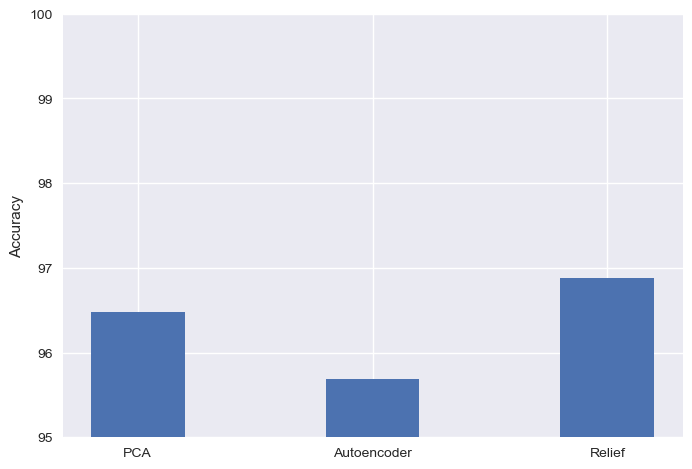

In [41]:
plot={"PCA":96.48,"Autoencoder":95.69,"Relief":96.88}
algorithm=list(plot.keys())
accuracy=list(plot.values())
plt.ylim([95,100])
plt.ylabel("Accuracy")
plt.bar(algorithm,accuracy,width=0.4)